In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
#from sklearn.preprocessing import StandardScaler


%store -r X_features
%store -r X_features_poly
%store -r y_labels

%store -r totaldf
totaldf = totaldf


In [2]:
voting_reg = joblib.load("voting_reg.pkl")
poly_ridge_reg = joblib.load("poly_ridge_reg.pkl")
svm_rbf_reg = joblib.load("svm_rbf_reg.pkl")
forest_reg = joblib.load("forest_regressor.pkl")
seq_model = keras.models.load_model('D:\python\\partial data\\first')



In [3]:
totaldf.insert(5,'poly ridge μ', totaldf.μob*(np.exp(np.power(poly_ridge_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(6,'rbf μ', totaldf.μob*(np.exp(np.power(svm_rbf_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(7,'forest μ', totaldf.μob*(np.exp(np.power(forest_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'voting μ', totaldf.μob*(np.exp(np.power(voting_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(9,'sequential', (np.exp(np.power(seq_model.predict(X_features[2]),2)) -0.0012))
totaldf.sequential = totaldf.sequential*totaldf.μob
totaldf.insert(10,'Beal', totaldf['μob'] +(0.001*totaldf['ΔP'])*(0.024*np.power(totaldf['μob'] ,1.6)+0.038*np.power(totaldf['μob'] ,0.56)))
totaldf.insert(11,'Kouzel modified',totaldf['μob']*np.exp((-2.34864*np.power(10,-5.0)+9.30705*np.power(10,-5.0)*np.power(totaldf['μob'],0.181))*totaldf.ΔP))

72/72 [==============================] - 0s 2ms/step


In [4]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(7):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Ridge Regression','SVM RBF kernel','Random Forest','Voting Regressor','ANN with 1 layer','Beal','Kouzel'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Ridge Regression,-0.472932,5.881186,3.606496,4.669604
SVM RBF kernel,-0.794406,5.763032,3.475656,4.665130
Random Forest,-0.303854,5.549532,3.493291,4.322794
Voting Regressor,-0.580324,5.574630,3.402190,4.454030
ANN with 1 layer,-1.023799,5.710593,3.438392,4.672954
Beal,-2.175139,5.988947,3.832978,5.089891
Kouzel,-2.154380,6.641349,4.222523,5.560501


In [5]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Ridge Regression,0.072108,6.509248,3.838866,6.806503
SVM RBF kernel,-0.532077,6.373293,3.631990,6.790930
Random Forest,-0.116098,5.971904,3.594845,6.934348
Voting Regressor,-0.371507,6.126770,3.553393,6.810214
ANN with 1 layer,-0.507048,6.291255,3.594151,7.070670
Beal,-1.162894,6.450436,3.680171,8.143270
Kouzel,-3.298770,7.359645,4.604329,7.877434


In [6]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Ridge Regression,-1.018508,5.025986,3.407843,42.415641
SVM RBF kernel,-1.422955,5.197634,3.566062,44.900586
Random Forest,-0.635388,5.269928,3.605800,43.950757
Voting Regressor,-1.037631,5.085633,3.463900,42.913525
ANN with 1 layer,-1.621323,4.959520,3.437040,43.873312
Beal,-4.357824,5.175205,4.836688,55.144181
Kouzel,-1.180694,4.970269,3.596200,39.466727


In [7]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Ridge Regression,-1.162761,4.119965,2.773814,157.228270
SVM RBF kernel,-0.427637,3.905952,2.625764,135.115206
Random Forest,-0.075540,3.973671,2.708963,131.734675
Voting Regressor,-0.252817,3.824722,2.557161,128.761582
ANN with 1 layer,-1.454037,3.867069,2.443161,151.236454
Beal,-1.963531,4.324108,2.537759,154.457237
Kouzel,0.989467,4.925511,3.658870,155.166079


In [8]:
def UndersatErrorPlot(a):
    models = ['forest','svm rbf','svm lin poly','ridge']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+7]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.figure(figsize=(12,8))
    


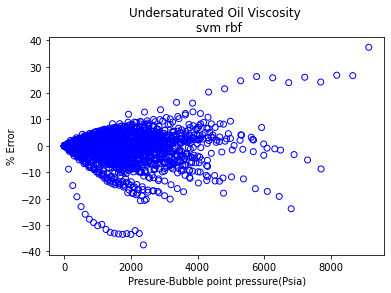

<Figure size 864x576 with 0 Axes>

In [9]:
UndersatErrorPlot('svm rbf')

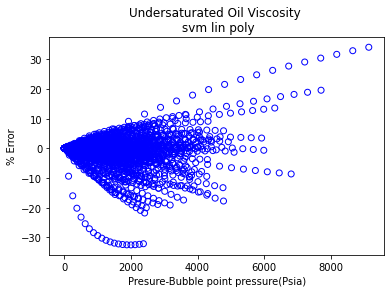

<Figure size 864x576 with 0 Axes>

In [10]:
UndersatErrorPlot('svm lin poly')

In [11]:
def UndersatViscPlot(a):
    models = ['forest','svm rbf','svm lin poly','ridge']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+7],facecolors ='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')
   